<a href="https://colab.research.google.com/github/nashatia/DQLAB/blob/main/Business_Decision_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Market Research and Recommendation and Visualization Technique for Business Decision Making**

DQLab sport center adalah toko yang menjual berbagai kebutuhan olahraga seperti Jaket, Baju, Tas, dan Sepatu. Toko ini mulai berjualan sejak tahun 2013, sehingga sudah memiliki pelanggan tetap sejak lama, dan tetap berusaha untuk mendapatkan pelanggan baru sampai saat ini.

Di awal tahun 2019,   manajer toko tersebut merekrut junior DA untuk membantu  memecahkan masalah yang ada di tokonya, yaitu menurunnya pelanggan yang membeli kembali ke tokonya.  Junior DA tersebut pun diberi kepercayaan mengolah data transaksi toko tersebut. Manajer toko mendefinisikan bahwa customer termasuk sudah bukan disebut pelanggan lagi (churn) ketika dia sudah tidak bertransaksi ke tokonya lagi sampai dengan 6 bulan terakhir dari update data terakhir yang tersedia.  

Manajer toko pun memberikan data transaksi dari tahun 2013 sampai dengan 2019 dalam bentuk csv (comma separated value) dengan data_retail.csv dengan jumlah baris 100.000 baris data.

Field yang ada pada data tersebut antara lain:

* No
* Row_Num
* Customer_ID
* Product
* First_Transaction
* Last_Transaction
* Average_Transaction_Amount
* Count_Transaction

Apakah faktor yang menyebabkan terjadinya penurunan pelanggan?

###**Data preparation**

####**Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

####**Read Data**

In [ ]:
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv', sep=';')

In [ ]:
print('Lima data teratas:')
df.head()

Lima data teratas:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [ ]:
print('\nInfo dataset:')
print(df.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB
None


In [ ]:
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [ ]:
print('Lima data teratas:')
df.head()

Lima data teratas:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25


In [ ]:
print('\nInfo dataset:')
print(df.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB
None


####**Churn Customers**

1. Kapan terakhir kali transaksi dilakukan?
2. Klasifikasi customer berstatus churn/tidak


In [ ]:
# Transaksi terakhir
print(max(df['Last_Transaction']))

2019-02-01 23:57:57.286000013


In [ ]:
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

In [ ]:
print('Lima data teratas:')
df.head()

Lima data teratas:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False


In [ ]:
print('\nInfo dataset:')
print(df.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
 8   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 6.9+ MB
None


In [ ]:
# Convert feature/column 'Month'
LE = LabelEncoder()
df['is_churn'] = LE.fit_transform(df['is_churn'])
print(LE.classes_)
print(np.sort(df['is_churn'].unique()))
print('')

[False True]
[0 1]



In [ ]:
df['is_churn']

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    0
Name: is_churn, Length: 100000, dtype: int64

In [ ]:
# Hapus kolom-kolom yang tidak diperlukan
del df['no']
del df['Row_Num']

# Cetak lima data teratas
print(df.head())

   Customer_ID Product  ... Count_Transaction is_churn
0        29531   Jaket  ...                22        0
1        29531  Sepatu  ...                41        0
2       141526     Tas  ...                30        0
3       141526   Jaket  ...                27        0
4        37545  Sepatu  ...                25        0

[5 rows x 7 columns]


###**Data Visualization**

In [ ]:
# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

####**Customer Acquisition by year**
Customer acquisition adalah proses  untuk mendatangkan pelanggan ke bisnis yang ditawarkan

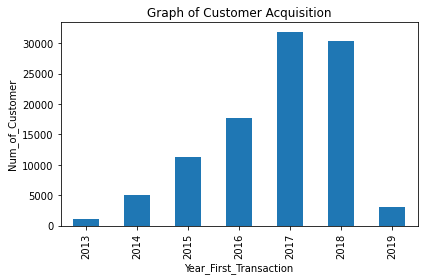

In [ ]:
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi bar chart, dapat diketahui bahwa :
* **Jumlah pelanggan tertinggi** yang pernah didapatkan diraih pada tahun **2017** dengan jumlah **lebih dari 30000** 
* **Jumlah pelanggan terendah** terjadi pada tahun **2013** dengan perolehan **kurang dari 5000**
 



####**Transaction by year**

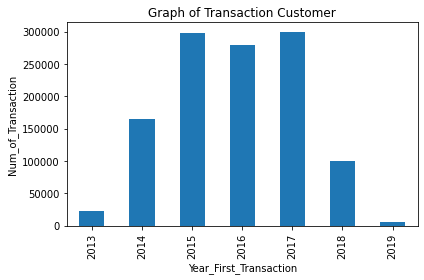

In [ ]:
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi bar chart, dapat diketahui bahwa :
* **Transaksi tertinggi** terjadi pada tahun **2015** dan **2017** dengan transaksi **lebih dari 250000**
* **Transaksi terendah** terjadi pada tahun **2019**

 



####**Average Transaction amount by Year**
Rata-rata jumlah transaksi setiap tahun

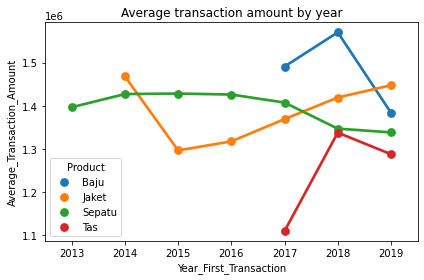

In [ ]:
plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product').set(title='Average transaction amount by year')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi, dapat diketahui bahwa :
* Transaksi penjualan jaket terus meningkat dari tahun 2015 hingga 2019
* Transaksi penjualan baju menurun pada tahun 2019 dibandingkan tahun 2018
* Transaksi penjualan tas menurun pada tahun 2019 dibandingkan tahun 2018
* Transaksi penjualan sepatu menurun pada tahun 2019 dibandingkan tahun 2018


 



####**Churned customer on each product**

<Figure size 432x288 with 0 Axes>

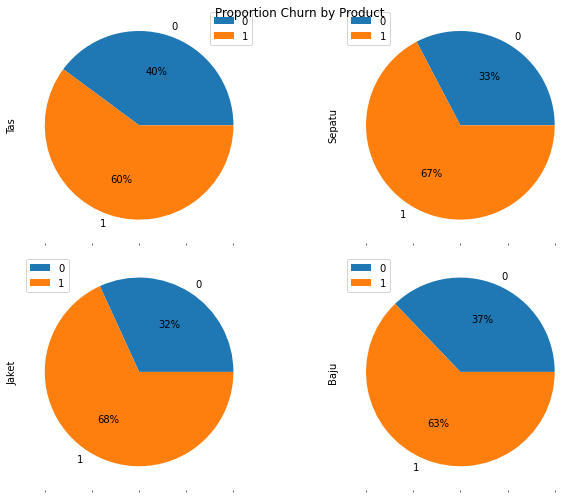

In [ ]:
plt.clf()
# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi pie chart, dapat diketahui bahwa :

> Terjadi churned customer pada setiap produk dengan persentase berkisar 60%-80%.




Menurut glints.com, customer churn rate adalah persentase pelanggan yang berhenti menggunakan layanan. Cara menghitung customer churn rate dengan membagi jumlah pelanggan yang ‘hilang’ pada jangka waktu tertentu (katakanlah Q1 tahun) dengan jumlah pelanggan yang didapatkan pada waktu yang sama. 

`Jika persentase churn rate perusahaanmu tinggi, hal yang terjadi adalah growth rate perusahaanmu menjadi lebih rendah.`

Berdasarkan visualisasi, timbul pertanyaan:
1. Apakah churn customer disebabkan oleh user produk dari yang ditawarkan kompetitor jauh lebih murah?
2. Apakah pelayanan di toko kamu kurang ramah bagi *customer*? 
3. Bagaiman cara mengatasi churn rate, sehingga tidak merugikan perusahaan?

####**Distribusi kategorisasi count transaction**
Kategorisasi ini dilakukan dengan mengelompokkan jumlah transaksi

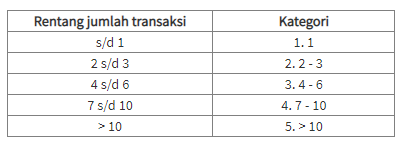

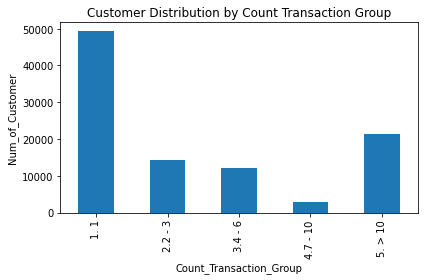

In [ ]:
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2.2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3.4 - 6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4.7 - 10'
    else:
        val ='5. > 10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi, diketahui bahwa:

**Transaksi yang paling sering terjadi/dominan adalah sekali transaksi sedangkan yang terendah adalah customer yang melakukan transasksi 7-10 kali**



####**Distribusi kategorisasi average transaction amount**

Kategorisasi ini dilakukan dengan mengelompokkan rata-rata besar transaksi

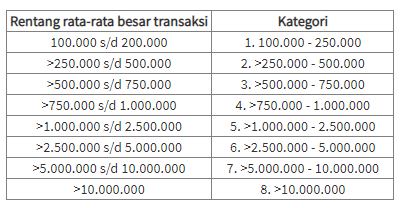


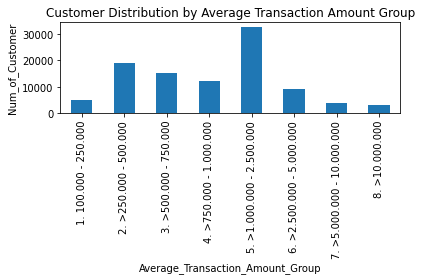

In [ ]:
plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 200000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
        val = '3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
        val = '4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val = '5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val = '6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val = '7. >5.000.000 - 10.000.000'
    else:
        val = '8. >10.000.000'
    return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi, diketahui bahwa:

**Rata-rata transaksi terjadi pada rentang angka > 1.000.000 hingga 2.500.000**

####**Modelling**
Modeling dilakukan untuk mengetahui customer churn di masa depan

**Features Columns and Target**

Membuat kolom fitur dan target(churn, tidak churn)

In [ ]:
# Feature column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns] 

# Target variable
y = df['is_churn'] 

print('Kolom Feature', X)
print('\nKolom Target',y)

Kolom Feature        Average_Transaction_Amount  Count_Transaction  Year_Diff
0                         1467681                 22          2
1                         1269337                 41          4
2                          310915                 30          2
3                          722632                 27          2
4                         1775036                 25          3
...                           ...                ...        ...
99995                      298662                  1          0
99996                      349556                  1          0
99997                      598013                  1          0
99998                     1208591                  1          0
99999                      486710                  1          0

[100000 rows x 3 columns]

Kolom Target 0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    0
Name: is_churn, Length: 100000, dtype: int64


**Split X dan y untuk training dan testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


<Figure size 432x288 with 0 Axes>

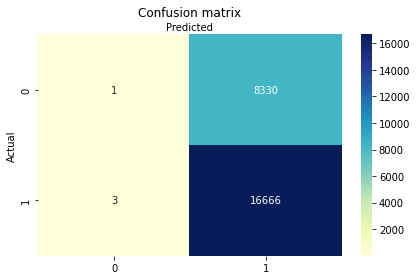

In [ ]:
plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall   : 0.66668


**Precision**

Dari semua model yang mengatakan pelanggan akan churn, 66.67% pelanggan benar-benar churn


**Recall**

Dari semua pelanggan yang dilihat benar-benar churn, 66.67% yang diidentifikasi dengan benar oleh model sebagai 'akan churn'


**Accuracy**

Dari semua prediksi yang dibuat, 66.67% bernilai benar